In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D,MaxPool1D,Flatten,Dense

In [2]:
# N : Normal Beat
# S : Supraventricular ectopic beats
# V : Ventricular Ectopic Beats
# F : Fusion Beats
# Q : Unknown Beats

In [3]:
train_df=pd.read_csv('mitbih_train.csv',header=None)

In [4]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


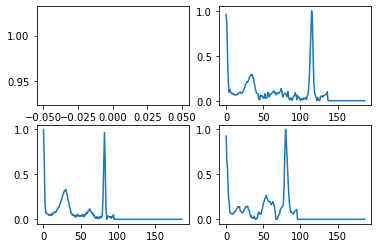

In [5]:
plt.subplot(2,2,1)
plt.plot(train_df.iloc[0,0])
plt.subplot(2,2,2)
plt.plot(train_df.iloc[1,:187])
plt.subplot(2,2,3)
plt.plot(train_df.iloc[2,:187])
plt.subplot(2,2,4)
plt.plot(train_df.iloc[3,:187])

In [6]:
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [7]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


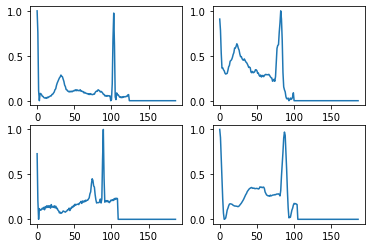

In [8]:
plt.subplot(2,2,1)
plt.plot(test_df.iloc[0,:187])
plt.subplot(2,2,2)
plt.plot(test_df.iloc[1,:187])
plt.subplot(2,2,3)
plt.plot(test_df.iloc[2,:187])
plt.subplot(2,2,4)
plt.plot(test_df.iloc[3,:187])

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


<BarContainer object of 5 artists>

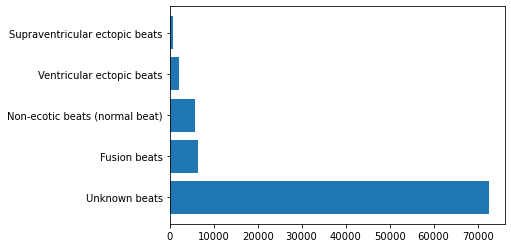

In [9]:
label_names  = ['Non-ecotic beats (normal beat)', 
                'Supraventricular ectopic beats', 
                'Ventricular ectopic beats', 
                'Fusion beats', 
                'Unknown beats']
labels = train_df[187].astype('int64')
equilibre = labels.value_counts()
print(equilibre)
plt.barh(list(set(label_names)),list(labels.value_counts()))

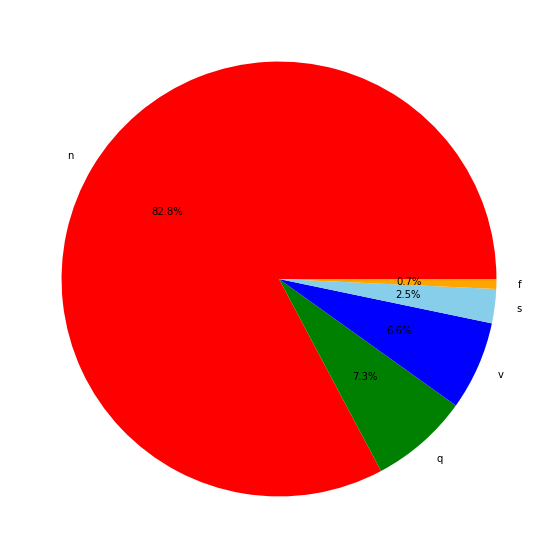

In [10]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
# plt.Circle((x,y),radius)
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
# autopct used to display the percent values using python string format
# p=plt.gcf()
# p.gca().add_artist(my_circle)
plt.show()

In [11]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [14]:
equilibre=train_df[187].value_counts()
print(equilibre)

0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: 187, dtype: int64


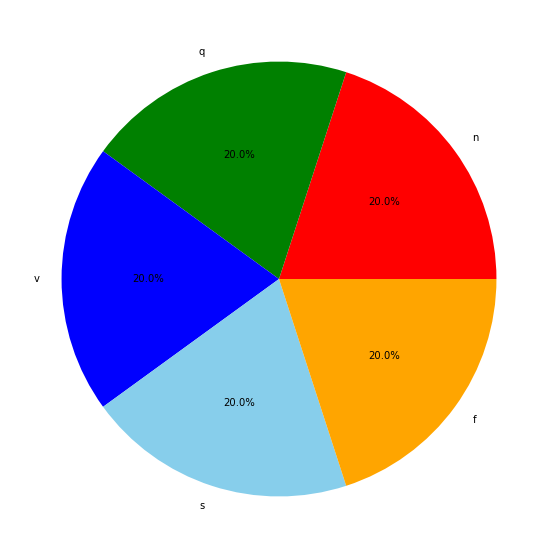

In [15]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
plt.show()

In [16]:
c=train_df.groupby(187).apply(lambda train_df:train_df.sample(1))
# Taking one sample for each level in the column 187
# 0 : N , 1 : S , 2 : V , 3 : F , 4 :Q
c

,,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
187,,,,,,,,,,,,,,,,,,,,,,
0.0,45908,0.991085,1.000000,0.747400,0.549777,0.555721,0.594354,0.600297,0.597325,0.594354,0.601783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,73836,0.990017,0.737105,0.098170,0.108153,0.299501,0.312812,0.326123,0.327787,0.322795,0.319468,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2.0,79341,0.000000,0.016071,0.051786,0.103571,0.140179,0.183036,0.236607,0.275893,0.329464,0.375893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3.0,80947,0.897338,1.000000,0.967681,0.583650,0.283270,0.165399,0.123574,0.102662,0.076046,0.076046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4.0,83734,0.896848,0.435530,0.441261,0.404011,0.398281,0.375358,0.358166,0.323782,0.289398,0.220630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [17]:
c.iloc[0,:186]

0      0.991085
1      1.000000
2      0.747400
3      0.549777
4      0.555721
         ...   
181    0.000000
182    0.000000
183    0.000000
184    0.000000
185    0.000000
Name: (0.0, 45908), Length: 186, dtype: float64

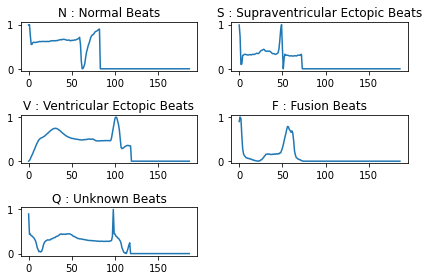

In [18]:
plt.subplot(3,2,1)
plt.plot(c.iloc[0,:187])
plt.title('N : Normal Beats')

plt.subplot(3,2,2)
plt.plot(c.iloc[1,:187])
plt.title('S : Supraventricular Ectopic Beats')

plt.subplot(3,2,3)
plt.plot(c.iloc[2,:187])
plt.title('V : Ventricular Ectopic Beats')

plt.subplot(3,2,4)
plt.plot(c.iloc[3,:187])
plt.title('F : Fusion Beats')

plt.subplot(3,2,5)
plt.plot(c.iloc[4,:187])
plt.title('Q : Unknown Beats')

plt.tight_layout()
plt.show()

In [115]:
tempo=c.iloc[0,:187]
bruiter = add_noise(tempo)

bruiter

0      0.546956
1      0.359970
2     -0.377345
3     -0.232623
4      0.552430
         ...   
182   -0.391408
183    0.827693
184    0.433776
185    0.239433
186   -0.085741
Name: (0.0, 45360), Length: 187, dtype: float64

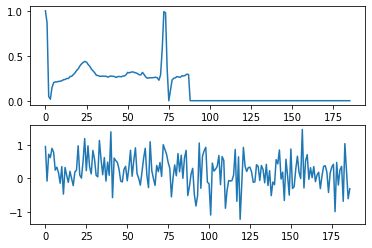

In [102]:
plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

In [112]:
xtrain=train_df.values[:,:187]

In [113]:
xtest=test_df.values[:,:187]

In [114]:
xtrain.shape

(87554, 187)

In [22]:
#Preprocessing 

In [25]:
def add_noise(signal):
    noise=np.random.normal(0,0.5,187)
    return (signal+noise)

In [68]:
for i in range(xtrain.shape[0]):
    xtrain[i,:187]=add_noise(xtrain[i,:187])

In [117]:
xtrain

array([[0.97794116, 0.92647058, 0.68137252, ..., 0.        , 0.        ,
        0.        ],
       [0.96011394, 0.86324787, 0.46153846, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.65945947, 0.18648648, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90612245, 0.62448978, 0.59591836, ..., 0.        , 0.        ,
        0.        ],
       [0.85822785, 0.64556962, 0.84556961, ..., 0.        , 0.        ,
        0.        ],
       [0.90150636, 0.84588647, 0.80069524, ..., 0.        , 0.        ,
        0.        ]])

# One Hot Encoding 

In [44]:
target_train = train_df[187]
target_train

10153    0.0
33886    0.0
32005    0.0
56159    0.0
61783    0.0
        ... 
81192    4.0
83696    4.0
84803    4.0
82876    4.0
86696    4.0
Name: 187, Length: 100000, dtype: float64

In [30]:
target_test=test_df[187]

In [31]:
target_test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: 187, Length: 21892, dtype: float64

The class labels of the dataset are integers(0-4).since this is a classification problem , the class labels are one hot encoded using the tensorflow.keras.utils.to_categorical function

example : Integer value 1 -------> [0,1,0,0,0]

In [32]:
y_train=to_categorical(target_train)

In [33]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [34]:
y_test = to_categorical(target_test)
y_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# Model

In [131]:
model = Sequential()

model.add(Conv1D(64, 6, activation = 'relu', 
                 input_shape = (64,1)))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = keras.optimizers.Adam(0.001), 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])

In [ ]:
ypred = model.predict(xtest)
cm = confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="black")

plt.imshow(cm, cmap=plt.cm.Blues)